## E13 - Face2Emoji 모바일 웹앱 만들기

In [1]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

# training, publictest, privatetest(80%, 10%, 10%)
# privatetest만 evaluation데이터로 사용, 나머지는 학습데이터로 사용
# X: 얼굴 흑백 픽셀값(pixels), y: 감정 번호(emotion)
with open(csv_path) as f:
    for line in tqdm.tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')
    
        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:23<00:00, 1507.41it/s]

train : 32298, eval :3589


Angry


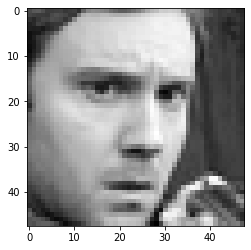

In [2]:
# 데이터 분리 확인

from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [3]:
# 모델 학습하기
import tensorflow as tf

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
64/64 [==============================] - 69s 1s/step - loss: 1.8326 - categorical_accuracy: 0.2413 - val_loss: 1.9324 - val_categorical_accuracy: 0.2449
Epoch 2/100
64/64 [==============================] - 6s 89ms/step - loss: 1.7002 - categorical_accuracy: 0.3206 - val_loss: 1.9200 - val_categorical_accuracy: 0.2449
Epoch 3/100
64/64 [==============================] - 6s 89ms/step - loss: 1.5871 - categorical_accuracy: 0.3809 - val_loss: 1.9136 - val_categorical_accuracy: 0.2449
Epoch 4/100
64/64 [==============================] - 6s 90ms/step - loss: 1.4839 - categorical_accuracy: 0.4309 - val_loss: 1.9128 - val_categorical_accuracy: 0.1655
Epoch 5/100
64/64 [==============================] - 6s 90ms/step - loss: 1.4003 - categorical_accuracy: 0.4666 - val_loss: 1.9129 - val_categorical_accuracy: 0.1655
Epoch 6/100
64/64 [==============================] - 6s 90ms/step - loss: 1.3368 - categorical_accuracy: 0.4902 - val_loss: 1.9087 - val_categorical_accuracy: 0.1655
Epoch

64/64 [==============================] - 6s 90ms/step - loss: 0.1871 - categorical_accuracy: 0.9349 - val_loss: 2.2157 - val_categorical_accuracy: 0.1655
Epoch 51/100
64/64 [==============================] - 6s 90ms/step - loss: 0.1668 - categorical_accuracy: 0.9423 - val_loss: 2.2776 - val_categorical_accuracy: 0.1655
Epoch 52/100
64/64 [==============================] - 6s 90ms/step - loss: 0.1727 - categorical_accuracy: 0.9408 - val_loss: 2.1655 - val_categorical_accuracy: 0.1658
Epoch 53/100
64/64 [==============================] - 6s 90ms/step - loss: 0.1199 - categorical_accuracy: 0.9591 - val_loss: 2.2982 - val_categorical_accuracy: 0.1655
Epoch 54/100
64/64 [==============================] - 6s 90ms/step - loss: 0.1306 - categorical_accuracy: 0.9545 - val_loss: 2.3399 - val_categorical_accuracy: 0.1655
Epoch 55/100
64/64 [==============================] - 6s 90ms/step - loss: 0.1106 - categorical_accuracy: 0.9620 - val_loss: 2.3934 - val_categorical_accuracy: 0.1655
Epoch 56/10

64/64 [==============================] - 6s 87ms/step - loss: 0.1200 - categorical_accuracy: 0.9572 - val_loss: 5.4931 - val_categorical_accuracy: 0.4358
Epoch 100/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0692 - categorical_accuracy: 0.9764 - val_loss: 4.9349 - val_categorical_accuracy: 0.4361


In [4]:
import os
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

In [ ]:
# 저장한 모델을 tensorflow.js가 활용할 수 있는 형태로 변환해주는 작업
# pip install tensorflowjs
# tensorflowjs_converter 활용

# cd ~/aiffel/tfjs_mobile
# tensorflowjs_converter --input_format=keras model.h5 model
# model 폴더 내에 확인 가능